In [20]:
import numpy as np 
import matplotlib.pylab as plt
%matplotlib inline

In [4]:
ts = np.linspace(0,10,100)
ys = ts*2 + 0.5*np.random.randn(100)


ys = ts*2 + 2.*np.random.randn(100)

In [ ]:
### Double check, since does not follow sensible trend

In [200]:

def fx(xp,
       vprev,
       f = np.array([1.,0,0,0,0]), # n+1
       gamma = 1.,
       dt=1.):
    
    dw = np.random.randn(1)[0]
    m=1.
    kernel = np.sum(f[1:]*vprev)
    ma = gamma*dw - kernel 
    #print ma, gamma, dw
    # http://ul.qucosa.de/fileadmin/data/qucosa/documents/18622/diff_fund_15%282011%295.pdf
    v = ma/m*dt
    #print v
    #print xv
    #print dw
    #x    = xp + xv
    x = xp + f[0]*v*dt 
    vn = np.concatenate(([v],vprev[:-1]))
    return x,vn

x = 0
v = np.array([0,0,0,0])
var = fx(x,v,f)

In [201]:
z = np.arange(5)
z[:-1]
print z

[0 1 2 3 4]


In [202]:

def simulate(
    x=0,
    v = -1, # ignore
    nsteps = 200,
    f=np.array([1,0,0,0,0]), # n+1 
    dt=1.
):

    v = np.zeros( np.shape(f)[0]-1)
    
    ts = np.arange(nsteps)
    xs = np.zeros(nsteps)
    vs = np.zeros(nsteps)

    np.random.seed(9001)
    for i in np.arange(nsteps):
      x,v = fx(x,v,f,dt=dt)
      xs[i]=x
      vs[i] =v[0]  
    
    return ts,xs,vs
#print xs
#print vs

In [236]:

f=np.array([1,0,0,0,0]) # n+1

def test(f=np.array([1,0,0,0,0]) # n+1
        ):
    #print f
    x = 0
    dt=1.    
    # simulate 
    ts,xs,vs = simulate(x=x,f=f,dt=dt)
    # get autocorrelation
    av = np.correlate(vs, vs, mode='same')

    plt.subplot(3,1,1)
    plt.plot(ts,xs)
    plt.subplot(3,1,2)
    plt.plot(ts,vs)

    plt.subplot(3,1,3)

    mp = np.shape(av)[0]/2
    #print mp
    rhs =np.abs(av[mp:])
    plt.plot(np.arange(nsteps/2)*2*dt,rhs/np.max(rhs))
    dar = np.max([10*dt,np.shape(f)[0]*dt])
    plt.xlim([0,dar])
    
    return av

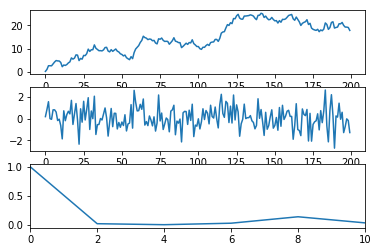

In [242]:
f=np.array([1]) # n+1
av=test(f)

[ 1.          0.81873075  0.67032005  0.54881164  0.44932896  0.36787944
  0.30119421  0.24659696  0.20189652  0.16529889  0.13533528  0.11080316
  0.09071795  0.07427358  0.06081006  0.04978707  0.0407622   0.03337327
  0.02732372  0.02237077  0.01831564  0.01499558  0.01227734  0.01005184
  0.00822975  0.00673795  0.00551656  0.00451658  0.00369786  0.00302755]


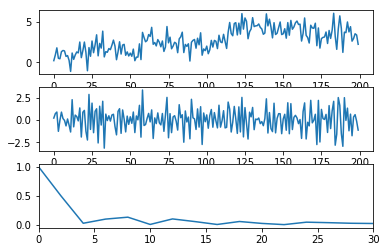

In [250]:
f = np.exp(-.2*np.arange(30))
print f
av2=test(f)

[ 1.          0.98019867  0.96078944  0.94176453  0.92311635  0.90483742
  0.88692044  0.86935824  0.85214379  0.83527021  0.81873075  0.8025188
  0.78662786  0.77105159  0.75578374  0.74081822  0.72614904  0.71177032
  0.69767633  0.68386141]


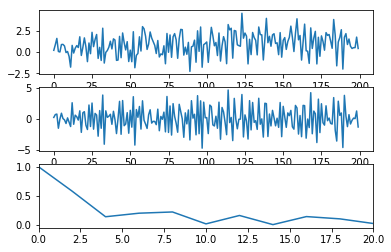

In [251]:
f = np.exp(-.02*np.arange(20))
print f
av3=test(f)

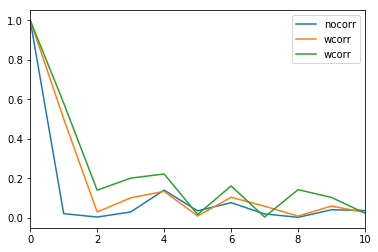

In [252]:
mp = np.shape(av)[0]/2
plt.plot(np.abs(av[mp:])/np.max(av[mp:]),label='nocorr')
plt.plot(np.abs(av2[mp:])/np.max(av2[mp:]),label="wcorr")
plt.plot(np.abs(av3[mp:])/np.max(av3[mp:]),label="wcorr")
plt.xlim([0,10])
plt.legend()